# 01] Regresión lineal simple
    - La regresión lineal simple es una herramienta estadística básica que permite conocer la relación lineal
    existente entre una variable explicativa (X) y una variable de respuesta (Y). El modelo se expresa como:
    
        y = b_0 + b_1*x + e
        E(y|x) = b_0 + b_1*x = E(b_0 + b_1*x + e)
        Var(y|x) = s_e^2 = Var (b_0 + b_1*x + e)
            
            Donde:
            x: Observación de la variable explicativa, regresor, independiente, predictora, etc.
            y: Observación de la variable de respuesta, objetivo, etc.
            e: Error de observación (media 0 y varianza s_e^2

        Observe que:
        La linea recta obtenida con el modelo es una sucesión de valores medios (esperanzas)
        
    - Al estudiar estos modelos es importante remarcar que correlación no implica causalidad. Por lo tanto,
    el hecho de que la variable Y sea explicada por X, no implica que X implica Y.
    
    - Los modelos de regresión lineal pueden emplearse para:
        - Descripción y resumen de datos
        - Estimación de parámetros
        - Predicción
        - Contro de procesos
        
    - El flujo de trabajo usual es el siguiente:
        1] Especificación del modelo
        2] Estimación de los parámetros
        3] Revisar adecuación del modelo
        4] Validación del modelo
        5] Utilizar el modelo

In [245]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t
from scipy.stats import f
from scipy.stats import chi2
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

### 1.1] Generar una población
    - Para el análisis que se realizará a continuación es preciso definir una población, para la cual 
    conozcamos los verdaderos valores de los parámetros

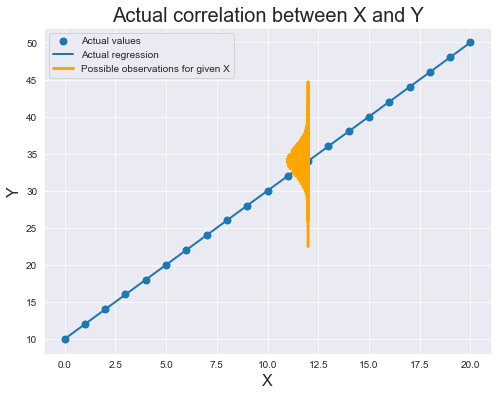

In [246]:
# Define actual parameter values
b_0 = 10
b_1 = 2
std_e = 5
var_e = std_e**2

# Create sequence of actual mean values
X = np.arange(0, 21)
Y = b_0 + b_1*X

# Generate possible observations range
x_sample = 12
n_sample = 100
y_sample = b_0 + b_1*x_sample
obs = np.sort(np.random.normal(size=n_sample, loc=y_sample, scale=std_e))
y_obs = norm.pdf(obs, scale=2, loc=y_sample)
y_obs = y_obs * -1 / y_obs.max()


# Plot actual observations and regression
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.scatterplot(x=X, y=Y, s=80, label="Actual values")
sns.lineplot(x=X, y=Y, linewidth=2, label="Actual regression")

# Plot possible observations
sns.lineplot(y=obs, x=y_obs+x_sample, color="orange", label="Possible observations for given X", linewidth=3)

# Chart settings
plt.title("Actual correlation between X and Y", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

### 1.2] Obtener una muestra para estimar los parámetros
    - Los parámetros b_o y b_1 son desconocidos, por lo que se deben estimar utilizando datos muestrales. A 
    continuación se obtiene una muestra del modelo teórico.
    
    - Los modelos de regresión lineal no deben ser empleados en límites más allá de los valores muestrales de 
    X, por lo que se forza a tenerlos en la muestra.
    
    - Los supuestos básicos en el análisis de regresión son que los errores son independientes, con media cero
    y varianza constante.

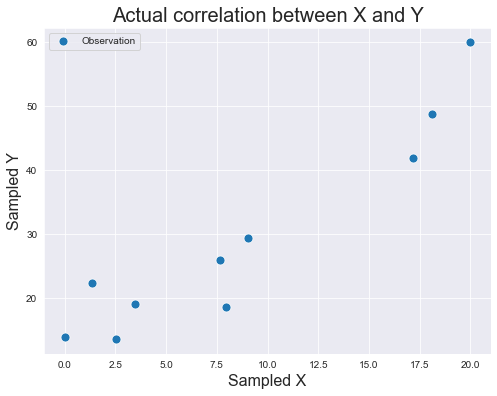

In [247]:
# Define sample size
n = 10

# Randomly generate observations
x_sample = np.concatenate((np.array([X.min(), X.max()]), np.random.uniform(size=n-2,low=0,high=X.max())))
x_sample = np.sort(x_sample)
y_sample = b_0 + b_1*x_sample + np.random.normal(size=n, loc=0, scale=std_e)

# Graph sample to beaaa adjusted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_sample, y=y_sample, s=80, label="Observation")

# Chart settings
plt.title("Actual correlation between X and Y", fontsize=20)
plt.xlabel("Sampled X", fontsize=16)
plt.ylabel("Sampled Y", fontsize=16)
plt.show()

### 1.3] Estimación de los parámetros
    - El método para estimar los parámetros es el de mínimos cuadrados. Los valores estimados son aquellos que
    minimizan el cuadarad0 de las diferencias entre el valor observado (y_i) y el valor estimado (y^_i)
        
        SS_Res = sum[i=1 to n]((y_i-y^_i)^2) = sum[i=1 to n](y_i - b^_0 -b^_1*x_i)^2
        
            Donde:
            SS_Res: Suma de cuadrados de los residuales
            y_i: Valor observado i de la variable Y
            y^_i : Valor estimado i de la variable i (para x_i)
            b^_0; Estimador de b_0
            b^_0: Estimador de b_1
            
    - Se definen las siguientes medidas:
        
        S_xx = sum[i=1 to n]((x_i-x_mean)^2)
        S_yy = sum[i=1 to n]((y_i-y_mean)^2)
        S_xy = sum[i=1 to n]((x_i-x_mean)*(y_i-y_mean))
        
    - Entonces, los estimadores de los coeficientes se calculan:
    
        b^_0 = y_mean - b^_1 * x_mean
        b^_1 = S_xy / S_xx


 Beta 0: 10 	 Estimated: 11.56
 Beta 1: 2 	 Estimated: 2.03 



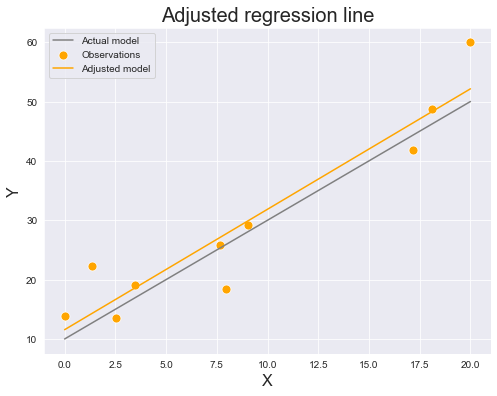

In [248]:
# Compute auxiliary measures
x_mean = x_sample.mean(0)
y_mean = y_sample.mean(0)
S_xx = ((x_sample - x_mean)**2).sum()
S_yy = ((y_sample - y_mean)**2).sum()
S_xy = ((x_sample - x_mean) * (y_sample - y_mean)).sum()

# Calculate beta estimators
b_1_est = S_xy / S_xx
b_0_est = y_mean - b_1_est*x_mean

# Calculate adjusted observations
y_sample_est = b_0_est + b_1_est * x_sample

# Print results
print("="*100+"\n\n",
      "Beta 0: {} \t Estimated: {:.2f}\n".format(b_0,b_0_est),
      "Beta 1: {} \t Estimated: {:.2f}".format(b_1,b_1_est),
      "\n\n"+"="*100)

# Graph resulting regression line
plt.figure(figsize=(8, 6))
sns.lineplot(x=X, y=Y, label="Actual model", color="gray")
sns.scatterplot(x=x_sample, y=y_sample, label="Observations", s=80, color="orange")
sns.lineplot(x=X, y=b_0_est+X*b_1_est, color="orange", label="Adjusted model")


# Chart settings
plt.title("Adjusted regression line", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

### 1.4] Estimación de la variana de los errores
    - Recordando el modelo descrito al principio, los errores tienen varianza s^2_e [var(e)], que es el 
    componente estpcástico que le transfiera variabilidad a las observaciones y_i. Para estimar la varianza de
    los errores se definen las siguientes métricas:
    
        SS_T = sum[i in n]((y_i - y_mean)^2)
        
            Donde:
            SS_T = Varianza total de las obserbaciones y
            
    - Una forma conveniente de calcular SS_Res es:
        
        SS_Res = SS_T - b^_1 * S_xy
        
    - Finalmente, la estimación de lo varianza de los errores es:
    
        s^^2_e = SS_Res / (n-2) = MS_Res
        
            Donde
            MS_Res: Residual Mean Square
            
            Observe que:
            Para obtener un estimador insesgado se consideran dos grados de libertad porque cada uno está 
            asociado con uno de los parámetros estimados
            
            

In [249]:
# Auxiliary values
SS_T = y_sample.var(0,ddof=1)
SS_Res = ((y_sample - (b_0_est + b_1_est * x_sample))**2).sum()

# Compute variance of errors
var_e_est = SS_Res / (n-2)
std_e_est = var_e_est**0.5

# Print results
print("="*100+"\n\n",
      "Var(e) 0: {} \t Estimated: {:.2f}\n".format(std_e,std_e_est),
      "\n"+"="*100)


 Var(e) 0: 5 	 Estimated: 5.57
 


### 1.5] Prueba de hipótesis e intervalos de confianza de los estimadores
    - Se hace la suposición adicional de que los errores se distribuyen normalmente. Debido a esta suposiciñon 
    y a que b^_1 se puede ver como una combinación lineal de y_i, donde y_i toma su carácter estocástico de los
    errores, entonces tenemos que b^_0 y b^_1 se distribuyen normalmente, centrados en el valor real del 
    parámetro y con las siguiens varianzas:
    
        var(b^_0) = MS_Res * (1/n + x_mean^2/S_xx)
        var(b^_1) = MS_Res/S_xx = SS_Res/((n-2)*S_xx)
        
            Donde:
            MS_Res: Residual Mean Square

    - Conociendo la distribución de las estimaciones de los coeficientes, así como su media (al ser insesgados)
    y su varianza, se construyen las pruebas de hipótesis e intervalos de confianza. Como se estima la media y 
    la varianza, los intervalos de confianza y las pruebas de hipótesis siguen una disribución t con (n-2) g.l.
    
    - La significancia de la regresión se prueba al hacer la hipótesis de que el coeficiente de la pendiente
    sea 0, lo que indicaría que no hay relación de dependencia entre X y Y. Implicaría que el mejor estimador
    para cualquier y_i sería y_mean.
    
    - Para el caso del varianza de los errores se tiene la siguiente expresión para calcular intervalos de 
    confianza, note que intervalos de confianza y pruebas de hipótesis pueden ser análogas.
    
        ci(s^^2_e) = [(n-2)*MS_Res/chi2(0.025,df=n-2), (n-2)*MS_Res/chi2(0.975,df=n-2)]
        
            Observe que:
            - La distribución que sigue el estimador de la varianza de los errores es una Chi 2 con (n-2)
            grados de libertad

In [250]:
# Compute variance for coefficients estimations
MS_Res = SS_Res / (n-2)
b_0_var = MS_Res * (1/n + x_mean**2/S_xx)
b_1_var = MS_Res/S_xx
var_e_var = (n-2) * MS_Res / var_e_est

# Compute standard deviatons
b_0_std = b_0_var**0.5
b_1_std = b_1_var**0.5

# Significance test for slope coefficient
p_value = t.pdf(b_1_est / b_1_var**0.5, df=n/2)
message = " | With at least 95% confidence, slope coefficient"
message += " IS NOT 0" if p_value<0.05 else " MIGHT BE 0"

# Print results
print("="*100+"\n\n"+"Significance of Regression: b_1=0\n"
      "p-value={:.4f}".format(p_value), message,
      "\n\n"+"="*100)

# Compute confidence intervals
b_0_ci = b_0_est + b_0_std*t.ppf([0.025, 0.975], df=n/2)
b_1_ci = b_1_est + b_1_std*t.ppf([0.025, 0.975], df=n/2)
var_e_ci = (n-2)*MS_Res / chi2.ppf([0.975, 0.025], df=n/2)

# Print results
print("\nConfidence Intervals\n"
      "b_0: Actual = {} | CI = [{}, {}]".format(b_0,*np.round(b_0_ci,2)),
      "\nb_1: Actual = {} | CI = [{}, {}]".format(b_1,*np.round(b_1_ci,2)),
      "\ns^2: Actual = {} | CI = [{}, {}]".format(var_e**0.5,*np.round(var_e_ci**0.5,2)),
      "\n\n"+"="*100)


Significance of Regression: b_1=0
p-value=0.0001  | With at least 95% confidence, slope coefficient IS NOT 0 


Confidence Intervals
b_0: Actual = 10 | CI = [4.3, 18.83] 
b_1: Actual = 2 | CI = [1.38, 2.68] 
s^2: Actual = 5.0 | CI = [4.4, 17.3] 



### 1.6] Análisis de varianza
    - Análogo a la varianza, se define la suma de cuadrados que mide la desviación de la variable de respuesta
    con respecto a su media:
    
        SS_T = sum[i=1 to n]((y_i - y_mean)*2)
        
            donde:
            SS_T: Total Sum of Squares - Variabilidad total de las observaciones
        
    - Convenientemente se puede realizar la partición de la variabilidad total del modelo, entre aquella que es 
    explicada por la regresión y la residual
    
        SS_T = SS_R + SS_Res        
        SS_R = b^_1 * S_xy = sum[i=1 to n]((y^_i - y_mean)^2)
        SS_Res = sum[i=1 to n]((y_i - y^_i)^2)
        
            donde:
            SS_R: Model Sum of Squares - Variabilidad explicada por el model
            SS_Res: Residual Sum of Squares - Variabilidad de los residuales
        
    - Los grados de libertad tienen una propiedad aditiva, por lo que para la expresión anterior:
    
        df(SS_T) = df(SS_R) + df(SS_Res)
        n-1      = 1        + n-2
        
            Observe que:
            MS_R = SS_R/df(SS_R) = SS_R/1
            MS_Res = SS_Res/df(SS_Res) = SS_Res/(n-1)
            
    - Alternativamente se puede realizar la prueba de hipótesis de que b_1=0 al calcular el estadístico F_0 que
    sigue una distribución Fisher con (1,n-2) grados de libertad:
    
        F_0 = MS_R / MS_Res
        
    - El coeficiente de determinación (R^2) es una medida de la variabilidad remanente en Y, después de que X 
    fue introducida. En otras palabras, es una medida de la proporción de la variabilidad que es explicada por
    el modelo.
    
        R^2 = SS_R/SS_T = 1 - SS_Res/SS_T
        
            Donde:
            R^2: Coeficiente de determinación

            Observe que:
            R^2 solo puede tomar valores entre 0 y 1. Cuando está cercano a 1 significa que X explica gran 
            parte de la variabilidad de Y, y viceversa.

In [251]:
# Compute sources of variance
SS_T = sum((y_sample - y_mean)**2)
SS_R = sum((y_sample_est - y_mean)**2)
SS_Res = sum((y_sample - y_sample_est)**2)

# Print results
print("="*100+"\n\n"+"Varianza Total (SS_T) = {:.0f}".format(SS_T),
      "\nVarianza del modelo (SS_R) = {:.0f}".format(SS_R),
      "\nVarianza residual (SS_Res) = {:.0f}".format(SS_Res),
      "\n\n"+"="*100)

# # Compute F-Fisher statistic
F_0 = (SS_R/1) / (SS_Res/(n-2))
p_value = 1 - f.cdf(F_0, dfn=1, dfd=n-2)
message = "With at leat 95% confidence, b_1 "
message += "IS NOT 0" if p_value<0.05 else "MIGHT BE 0"

# Print results
print("\nSignificance of Regression: b_1=0\n"
      "p-value = {:.4f} | ".format(p_value), message,
      "\n\n"+"="*100)

# Compute coefficient of determination
R_2 = SS_R / SS_T
print("\nCoefficient of Determination\nR^2: {:.2%}".format(R_2),
      "\n\n"+"="*100)


Varianza Total (SS_T) = 2245 
Varianza del modelo (SS_R) = 1997 
Varianza residual (SS_Res) = 249 


Significance of Regression: b_1=0
p-value = 0.0000 |  With at leat 95% confidence, b_1 IS NOT 0 


Coefficient of Determination
R^2: 88.93% 



### 1.7] Intervalos de estimación de la respuesta media y de predicción
    - Para este punto es necesaria la explicación que la predicción de la respuesta media y de una nueva 
    observación son conceptos distintos. La predicción de la respuesta media supone la predicción de todas las
    posibles rectas de ajuste (recuerde que y^_i = E(y_i|x_i)), mientras que la predicción de una nueva 
    observación constituye las posibleas realizaciones de un solo punto y no el valor esperado de muchos.
    
    - Los intervalos de estimación de la respuesta media se construyen a partir de la siguiente varianza, 
    considerando una distribución t(df=n-2)
    
        var(y^_0_mean) = s^^2_e * ( 1/n + (x_0-x_mean)^2/S_xx )
        
            donde:
            x_0: Valor en X para el cual se quiere estimar la respuesta media
            y^_0_mean: Valor esperado del valor de y_0 dado un x_0
            
            observe que:
            - El intervalo es mínimo cuando x_0 = x_mean, esto quiere decir que mientras mas se alaje del 
            centroide, los intervalos se ensanchan
        
    - Los intervalos de predicción de una nueva observación, análogamente se calculan como:
    
        var(y^_0) = s^^2_e + var(y^_i_mean) = s^^2_e * ( 1 + 1/n + (x_0-x_mean)^2/S_xx )
        
            observe que:
            - Cuando se construyan intervalos de confianza, se asume la respuesta media extrema y se añade el 
            la varianza de los errores a partir de este punto, lo que implica bandas de confianza más anchas.

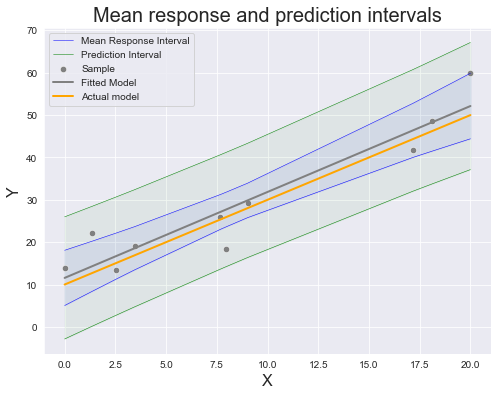

In [252]:
# Compute variance of mean response and prediction
mean_response_var = var_e_est * ( 1/n + (x_sample - x_mean)**2/S_xx )
prediction_var = mean_response_var + var_e_est

# Calculate confidence bands for mean response
mean_response_lower = y_sample_est + t.ppf(0.025, df=n-2) * mean_response_var**0.5
mean_response_upper = y_sample_est + t.ppf(0.975, df=n-2) * mean_response_var**0.5

# Calculate confidence bands for prediction
prediction_lower = y_sample_est + t.ppf(0.025, df=n-2) * prediction_var**0.5
prediction_upper = y_sample_est + t.ppf(0.975, df=n-2) * prediction_var**0.5

# Fig size
plt.figure(figsize=(8, 6))

# Mean response interval
sns.lineplot(x=x_sample, y=mean_response_lower, color="blue", linewidth=0.5)
sns.lineplot(x=x_sample, y=mean_response_upper, color="blue", linewidth=0.5, label="Mean Response Interval")
plt.fill_between(x_sample, mean_response_lower, mean_response_upper, color="BLue", alpha=0.05)

# Prediction interval
sns.lineplot(x=x_sample, y=prediction_lower, color="green", linewidth=0.5)
sns.lineplot(x=x_sample, y=prediction_upper, color="green", linewidth=0.5, label="Prediction Interval")
plt.fill_between(x_sample, prediction_lower, prediction_upper, color="green", alpha=0.05)

# Plot sample, fitted model and actual model
sns.scatterplot(x=x_sample, y=y_sample, s=40, color="gray", label="Sample")
sns.lineplot(x=x_sample, y=y_sample_est, color="gray", linewidth=2, label="Fitted Model")
sns.lineplot(x=X, y=Y, color="orange", linewidth=2, label="Actual model")

# Chart settings
plt.title("Mean response and prediction intervals", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

### 1.8] Cálculo con librerías
    - A continuación se ejecuta una librería para realizar los cálculos de manera automática y se presenta el
    output para su interpretación

In [253]:
# Mute warnings
warnings.filterwarnings("ignore", category=Warning)

# Fit and summarize OLS model
mod = sm.OLS(y_sample, sm.add_constant(x_sample, prepend=False))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     64.24
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           4.31e-05
Time:                        13:21:32   Log-Likelihood:                -30.256
No. Observations:                  10   AIC:                             64.51
Df Residuals:                       8   BIC:                             65.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0287      0.253      8.015      0.0